## Importing Libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

## Downloading Dataset from Kaggle

In [5]:
!kaggle datasets download -d omkargurav/face-mask-dataset --force

from zipfile import ZipFile
import os

zip_path = 'face-mask-dataset.zip'
if os.path.exists(zip_path):
    with ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall()
        print('Dataset extracted successfully!')
else:
    print(f'File not found: {zip_path}')

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown




  0%|          | 0.00/163M [00:00<?, ?B/s]
  1%|          | 1.00M/163M [00:00<01:42, 1.66MB/s]
  1%|1         | 2.00M/163M [00:00<01:10, 2.40MB/s]
  2%|1         | 3.00M/163M [00:01<00:57, 2.92MB/s]
  2%|2         | 4.00M/163M [00:01<00:51, 3.26MB/s]
  3%|3         | 5.00M/163M [00:01<00:44, 3.74MB/s]
  4%|3         | 6.00M/163M [00:01<00:41, 4.01MB/s]
  4%|4         | 7.00M/163M [00:02<00:38, 4.25MB/s]
  5%|4         | 8.00M/163M [00:02<00:36, 4.45MB/s]
  6%|5         | 9.00M/163M [00:02<00:37, 4.35MB/s]
  6%|6         | 10.0M/163M [00:02<00:36, 4.41MB/s]
  7%|6         | 11.0M/163M [00:02<00:33, 4.78MB/s]
  7%|7         | 12.0M/163M [00:03<00:30, 5.15MB/s]
  8%|7         | 13.0M/163M [00:03<00:27, 5.80MB/s]
  9%|8         | 14.0M/163M [00:03<00:27, 5.78MB/s]
  9%|9         | 15.0M/163M [00:03<00:26, 5.86MB/s]
 10%|9         | 16.0M/163M [00:03<00:25, 5.98MB/s]
 10%|#         | 17.0M/163M [00:03<00:25, 6.02MB/s]
 11%|#1        | 18.0M/163M [00:04<00:24, 6.23MB/s]
 12%|#1        | 19.

Dataset extracted successfully!


In [13]:
# Loading the image paths
with_mask_dir = './data/with_mask'
without_mask_dir = './data/without_mask'
with_mask_files = os.listdir(with_mask_dir)
without_mask_files = os.listdir(without_mask_dir)

In [14]:
print('Number of images with mask:', len(with_mask_files))
print('Number of images without mask:', len(without_mask_files))

Number of images with mask: 3725
Number of images without mask: 3828


####  Creating labels for the images (1 for with mask, 0 for without mask)

In [15]:
with_mask_labels = [1] * len(with_mask_files)
without_mask_labels = [0] * len(without_mask_files)
labels = with_mask_labels + without_mask_labels

####  Displaying sample images

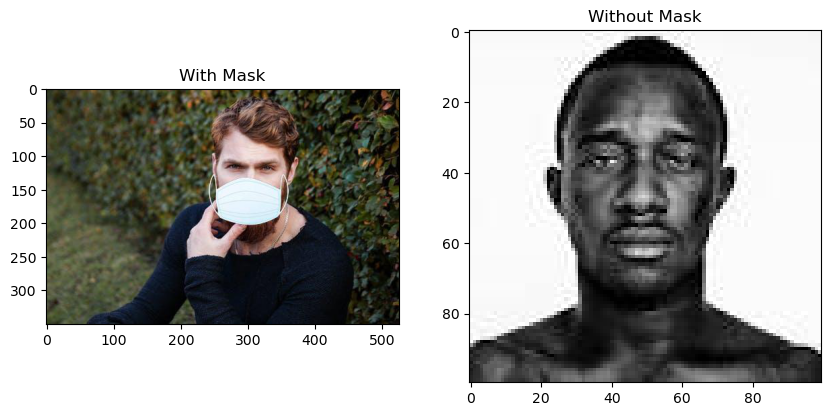

In [16]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
img = plt.imread(os.path.join(with_mask_dir, with_mask_files[0]))
plt.imshow(img)
plt.title("With Mask")
plt.subplot(1, 2, 2)
img = plt.imread(os.path.join(without_mask_dir, without_mask_files[0]))
plt.imshow(img)
plt.title("Without Mask")
plt.show()

#### Preprocessing images and converting to numpy arrays


In [18]:
data = []

def load_and_preprocess_images(image_files, image_dir):
    for img_file in image_files:
        image_path = os.path.join(image_dir, img_file)
        image = Image.open(image_path)
        image = image.resize((128, 128))
        image = image.convert('RGB')
        image = np.array(image)
        data.append(image)

load_and_preprocess_images(with_mask_files, with_mask_dir)
load_and_preprocess_images(without_mask_files, without_mask_dir)

X = np.array(data)
Y = np.array(labels)

#### Splitting the data into training and testing sets

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

### Building the CNN model

In [20]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation='softmax')
])

C:\Users\Ajupo\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


### Compiling the model

In [21]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Training the model


In [22]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=15)

Epoch 1/15
170/170 ━━━━━━━━━━━━━━━━━━━━ 44s 243ms/step - accuracy: 0.7274 - loss: 0.6099 - val_accuracy: 0.8727 - val_loss: 0.3146
Epoch 2/15
170/170 ━━━━━━━━━━━━━━━━━━━━ 43s 251ms/step - accuracy: 0.8751 - loss: 0.3208 - val_accuracy: 0.9240 - val_loss: 0.1785
Epoch 3/15
170/170 ━━━━━━━━━━━━━━━━━━━━ 39s 226ms/step - accuracy: 0.8987 - loss: 0.2511 - val_accuracy: 0.9306 - val_loss: 0.1629
Epoch 4/15
170/170 ━━━━━━━━━━━━━━━━━━━━ 40s 238ms/step - accuracy: 0.9176 - loss: 0.2058 - val_accuracy: 0.9372 - val_loss: 0.1656
Epoch 5/15
170/170 ━━━━━━━━━━━━━━━━━━━━ 39s 231ms/step - accuracy: 0.9309 - loss: 0.1873 - val_accuracy: 0.9537 - val_loss: 0.1438
Epoch 6/15
170/170 ━━━━━━━━━━━━━━━━━━━━ 36s 209ms/step - accuracy: 0.9440 - loss: 0.1521 - val_accuracy: 0.9438 - val_loss: 0.1399
Epoch 7/15
170/170 ━━━━━━━━━━━━━━━━━━━━ 52s 304ms/step - accuracy: 0.9566 - loss: 0.1117 - val_accuracy: 0.9322 - val_loss: 0.1722
Epoch 8/15
170/170 ━━━━━━━━━━━━━━━━━━━━ 53s 311ms/step - accuracy: 0.9576 - loss: 0

### Evaluating the model

In [23]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy:', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9329 - loss: 0.2542
Test Accuracy: 0.9318332076072693


### Plotting training and validation loss

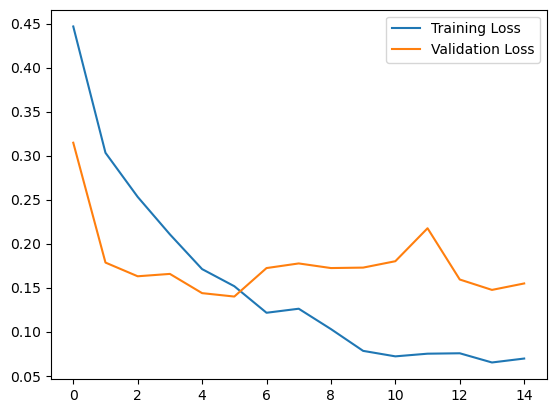

In [24]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

### Plotting training and validation accuracy

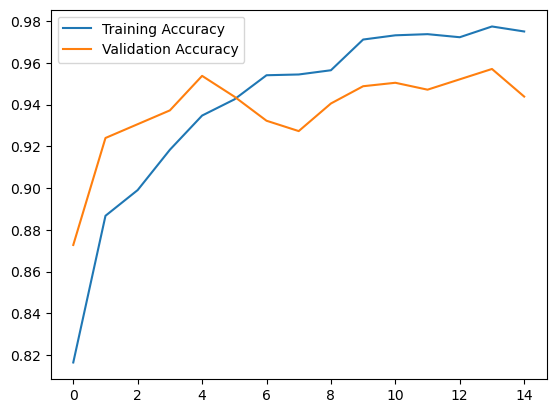

In [25]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

### Prediction on a new image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
The model predicts that the image is: Without Mask


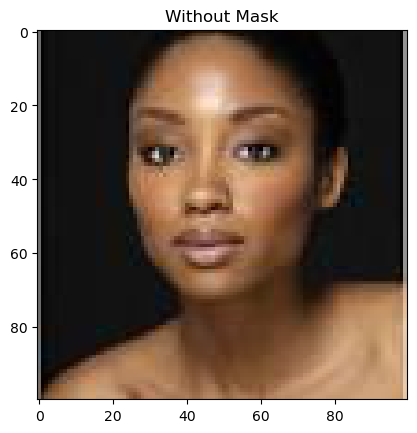

In [34]:
def predict_on_image(image_path, model):
    # Load and preprocess the image
    image = Image.open(image_path)
    image = image.resize((128, 128))
    image = image.convert('RGB')
    image = np.array(image)
    image = image / 255.0  # Normalize the image

    # Reshape the image to match the model's input shape
    image = np.expand_dims(image, axis=0)  
    
    
    prediction = model.predict(image)
    predicted_class = np.argmax(prediction, axis=1)[0]

    
    if predicted_class == 1:
        label = "With Mask"
    else:
        label = "Without Mask"
    
    return label


image_path = os.path.join(without_mask_dir, without_mask_files[10])  
predicted_label = predict_on_image(image_path, model)
print(f'The model predicts that the image is: {predicted_label}')

# Visualize the image with the prediction
img = plt.imread(image_path)
plt.imshow(img)
plt.title(predicted_label)
plt.show()